In [45]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs
# Generate synthetic data
np . random . seed (0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers ,
random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np . dot (X , transformation )
# Add a bias term to the feature matrix
X = np . c_ [ np . ones (( X . shape [0] , 1) ) , X ]
# Initialize coefficients
W = np . zeros ( X . shape [1])
# Define the logistic sigmoid function
def sigmoid ( z ) :
    return 1 / (1 + np . exp ( - z ) )
# Define the logistic loss ( binary cross - entropy )function
def log_loss ( y_true , y_pred ) :
    epsilon = 1e-15
    y_pred = np . clip ( y_pred , epsilon , 1 - epsilon ) # Clipto avoid log (0)
    return - ( y_true * np . log ( y_pred ) + (1 - y_true ) * np .log (1 - y_pred ) )
# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []

Text(0.5, 1.0, 'Logistic Regression Loss per Iteration')

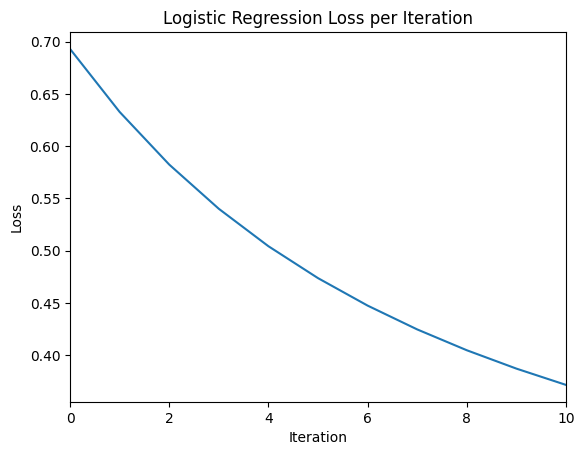

In [46]:
#updating weights using gradient descent
for i in range ( iterations ) :
    predictions = sigmoid ( np . dot ( X , W ) )
    loss = log_loss ( y , predictions )
    loss_history . append ( loss . mean () )
    N= y . size
    gradient = np . dot ( X . T , ( predictions - y ) )
    W -= learning_rate * 1/N*gradient

#calculating the loss function after the last iteration
predictions = sigmoid ( np . dot ( X , W ) )
loss = log_loss ( y , predictions )
loss_history . append ( loss . mean () )

# Plot the loss function values
plt . plot ( loss_history )
plt.xlim ( 0 , iterations )
plt . xlabel ( 'Iteration' )
plt . ylabel ( 'Loss' )
plt . title ( 'Logistic Regression Loss per Iteration' )


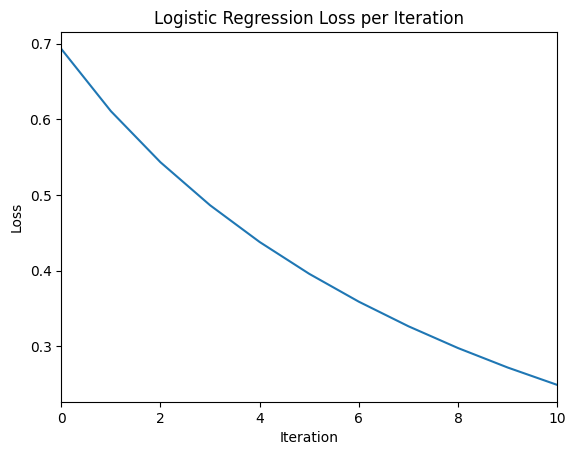

In [47]:
iterations = 10
W = np . zeros ( X . shape [1])
loss_history1 = []
#updating weights using Newton's method
for i in range ( iterations ) :
    predictions = sigmoid ( np . dot ( X , W ) )
    loss = log_loss ( y , predictions )
    #print(loss.sum())
    loss_history1 . append ( loss . mean () )
    N= y . size
    gradient = 1/N*np . dot ( X . T , ( predictions - y ) )
    H = 1/N*np . dot ( X . T , np . dot ( np . diag ( predictions * (1 - predictions )) , X ) )
    W -= learning_rate * np . linalg . inv ( H ) . dot ( gradient )
#calculating the loss function after the last iteration
predictions = sigmoid ( np . dot ( X , W ) )
loss = log_loss ( y , predictions )
loss_history1 . append ( loss . mean () )

# Plot the loss function values
plt . plot ( loss_history1 )
plt. xlim ( 0 , iterations )
plt . xlabel ( 'Iteration' )
plt . ylabel ( 'Loss' )
plt . title ( 'Logistic Regression Loss per Iteration' )
plt . show ()


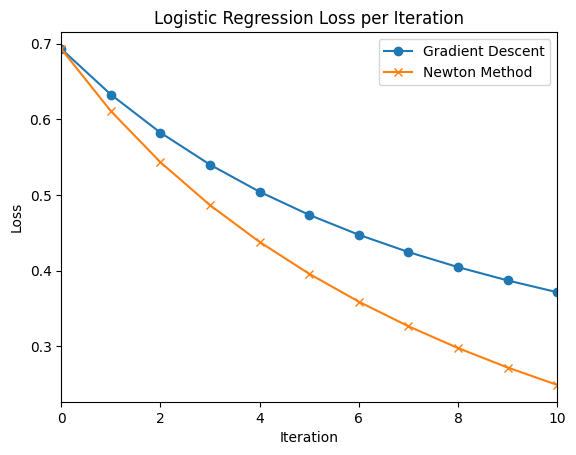

In [48]:
#plot both losses in one graph
plt . plot ( loss_history ,label='Gradient Descent',marker='o' )
plt . plot ( loss_history1,label='Newton Method',marker='x' )
plt . xlim ( 0 , iterations )
plt . xlabel ( 'Iteration' )
plt . ylabel ( 'Loss' )
plt . title ( 'Logistic Regression Loss per Iteration' )
plt.legend()
plt . show ()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

# Data loading
train_samples = 500
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)

c:\Python311\cv\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


it creates a sequence of integers that represents the indices of the samples in the dataset but in a random order.
X = X[permutation] and y = y[permutation]: These lines apply the permutation to both the data (X) and the labels (y). This effectively shuffles the dataset randomly.
By applying this permutation to both the data (X) and the labels (y), the dataset is effectively shuffled randomly, ensuring that the order of samples is not biased when splitting it into training and test sets. This shuffling helps prevent any potential biases that might exist in the original ordering of the dataset.

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])

param_grid = {
    'lasso_logistic__C': np.logspace(-2, 2,9)
}

grid_search = GridSearchCV(pipeline, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_estimator_.get_params()
best_estimator = grid_search.best_estimator_
print("Best parameters set:")
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Best parameters set:
	lasso_logistic__C: 1.0


In [16]:
accuracy = best_estimator.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.2f}")

Accuracy on test data: 0.80


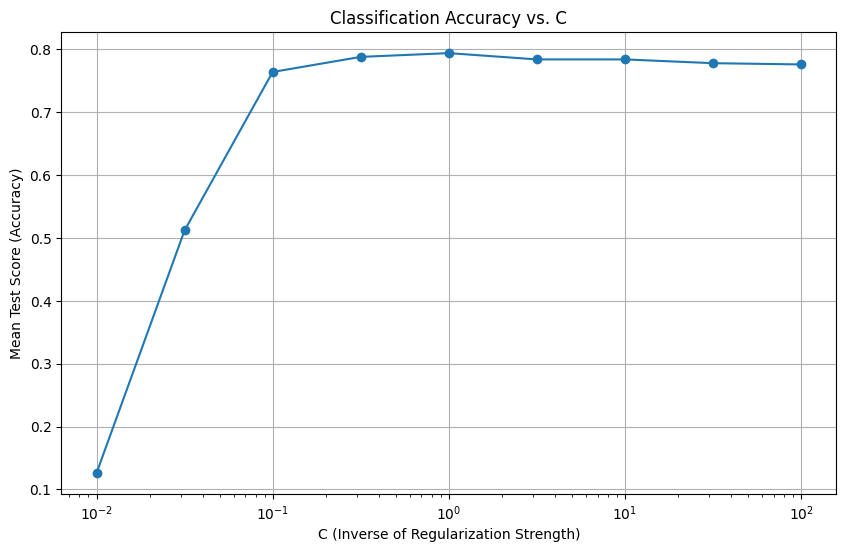

In [22]:
grid_results = grid_search.cv_results_
c_values = grid_results['param_lasso_logistic__C'].data.astype(float)
mean_test_scores = grid_results['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(c_values, mean_test_scores, marker='o')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Classification Accuracy vs. C')
plt.grid(True)
plt.show()






In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predicted_test=best_estimator.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_predicted_test)

# Access individual values from the confusion matrix
print(conf_matrix)
precision = precision_score(y_test, y_predicted_test, average=None)
recall = recall_score(y_test, y_predicted_test, average=None)
f1 = f1_score(y_test, y_predicted_test, average=None)
accuracy = accuracy_score(y_test, y_predicted_test)
for i in range(len(precision)):
    print(f"Class {i}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-score={f1[i]:.2f}")





[[ 5  0  0  0  0  0  2  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  1  0  1]
 [ 0  0  0  7  0  1  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  1  2  0]
 [ 0  1  1  0  1  1  8  0  0  0]
 [ 0  0  1  0  0  1  0  7  0  1]
 [ 0  1  0  1  0  1  0  0  5  0]
 [ 0  0  0  0  1  0  0  1  0  4]]
Class 0: Precision=1.00, Recall=0.71, F1-score=0.83
Class 1: Precision=0.85, Recall=1.00, F1-score=0.92
Class 2: Precision=0.88, Recall=0.88, F1-score=0.88
Class 3: Precision=0.88, Recall=0.88, F1-score=0.88
Class 4: Precision=0.83, Recall=1.00, F1-score=0.91
Class 5: Precision=0.67, Recall=0.73, F1-score=0.70
Class 6: Precision=0.80, Recall=0.67, F1-score=0.73
Class 7: Precision=0.70, Recall=0.70, F1-score=0.70
Class 8: Precision=0.71, Recall=0.62, F1-score=0.67
Class 9: Precision=0.67, Recall=0.67, F1-score=0.67


In [47]:
overall_f1 = f1_score(y_test, y_predicted_test, average='weighted')
overall_precision = precision_score(y_test, y_predicted_test, average='weighted')
overall_recall = recall_score(y_test, y_predicted_test, average='weighted')
print(f"Overall Accuracy: {accuracy}")
print(f"Overall F1-score: {overall_f1:.2f}")
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")


Overall Accuracy: 0.8
Overall F1-score: 0.80
Overall Precision: 0.80
Overall Recall: 0.79
